In [1]:
from torch import tensor
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision.datasets import MNIST
from torchvision.transforms import Resize, ToTensor, Compose, Normalize
import numpy as np

In [2]:
transform = Compose([
        ToTensor(),
        Normalize(mean=[0.0], std=[1.0])]) 

0it [00:00, ?it/s]

100%|█████████▉| 9871360/9912422 [00:13<00:00, 1788298.56it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



0it [00:00, ?it/s]


  0%|          | 0/28881 [00:00<?, ?it/s]
32768it [00:00, 66867.16it/s]                            

0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



 97%|█████████▋| 1605632/1648877 [00:06<00:00, 253668.27it/s]
1654784it [00:06, 288330.91it/s]                             

0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




8192it [00:00, 22258.06it/s]            


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


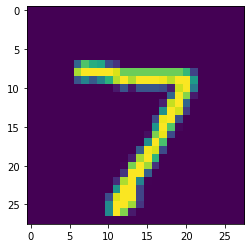

In [3]:
from torch.utils.data import DataLoader

data_train = MNIST('./', download=True, train=True, transform=transform)
data_test = MNIST('./', download=True, train=False, transform=transform)

plt.imshow(data_test.data[0])

## Задание 1
Напишите класс для нашей модели.
Не забудьте про препроцессинг данных - свернуть картинки в вектора размером 784.

Создаем класс для нашей нейронной сети. Чтобы класс был доступен для автодифференцирования и Pytorch воспринимал его как обучаемую модель - наследуем его от класса torch.nn.Module

В методе `__init__` мы прописывем архитектуру нашей модели - какие будут слои, каких они будут размеров.
Все слои мы сохраняем как свойства класса в `self.`

Метод `forward` должен описивать процесс forward pass - какие операции происходят с входящими данными. Именно на основе forward функции pytorch понимает как делать backward pass.

In [37]:
from torch import nn
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size) # Your Code here
        self.layer2 = nn.Linear(hidden_size, output_size)# ...
        # ...
    
    
    def forward(self, x):
        x = x.view(-1, 784).float()
        x = self.layer1(x) # Your Code here
        x = torch.relu(x) # ...
        x = self.layer2(x) # ...
        return x

Заполните модель, лосс и оптимизатор

In [38]:
model = NeuralNetwork(784, 45, 10) # Создайте модель Neural Network
# Выберете правильный input_size, output_size и выберете hidden_size

In [39]:
loss_function = torch.nn.CrossEntropyLoss() # Какую loss функцию выберете?
# Вы можете использовать библиотеку torch.nn чтобы создать loss функцию которая вам подходит

In [55]:
from torch.optim import SGD

optim = SGD(model.parameters(), lr=0.1)
# Инициализируйте оптимизатор и передайте ему параметры модели и learning_rate

## Задание 2
Дозаполните функцию run_epoch

In [56]:
def run_epoch(data, model, loss_function, optimiser, mode='train'):
    losses, scores = [], []
    
    for x, y in tqdm_notebook(data):    
        # 1. Forward pass
        y_hat = model(x)
        
        # 2. Calculate loss
        loss = loss_function(y_hat, y)
        
        if mode == 'train':
            # 3. Make backward pass
            loss.backward()
            
            # 4. Update model with optimiser
            optim.step()
            
        # 5. Zero gradients
        optim.zero_grad()
        
        losses.append(loss.item())
        scores.append(score(y_hat, y))
    print(f"Loss {np.mean(losses)}, Accuracy: {np.mean(scores)}")

In [57]:
train = DataLoader(data_train, batch_size=256)
test = DataLoader(data_test, batch_size=512)

## Задание 3
Обучите модель хотя бы до 0.9 точности. Вы можете менять learning_rate там где инициализировали оптимизатор.
Вы так же можете экспериментировать с количеством слоев, функциями активации, количеством нейронов в скрытом слое, изменяя модель Neural Network и посмотреть на результат. Чем больше экпериментов вы проведете - тем лучше.

# Accuracy 0.93 with 0.1 learning rate, 45 hidden layers and CrossEntropyLoss

In [58]:
def score(y_hat, y_true):
    preds = torch.argmax(y_hat, dim=1)
    return (preds==y_true).float().mean()

In [59]:
from tqdm import tqdm_notebook

EPOCHS = 5

for i in range(EPOCHS):
    run_epoch(train, model, loss_function, optim)
    run_epoch(test, model, loss_function, optim, mode='eval')


Loss 0.7467536207209242, Accuracy: 0.8213042616844177



Loss 0.39781464710831643, Accuracy: 0.8861385583877563



Loss 0.35835236231697365, Accuracy: 0.8984098434448242



Loss 0.32238673493266107, Accuracy: 0.9065142869949341



Loss 0.30898500300468285, Accuracy: 0.912367045879364



Loss 0.28854492157697675, Accuracy: 0.9161075353622437



Loss 0.2783007314547579, Accuracy: 0.9209275245666504



Loss 0.2629853568971157, Accuracy: 0.9242130517959595



Loss 0.2540812407085236, Accuracy: 0.9278368353843689



Loss 0.2422059014439583, Accuracy: 0.9308077096939087
